<a href="https://colab.research.google.com/github/mesrp88/numpy_pandas_uses/blob/main/peak_hours_for_solor_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I am going to calculate the peaksun hour from the solar radiation data given.

In [64]:
import pandas as pd  #for data loading
import numpy #mathematics calculation
from numpy import trapz   #for find area under curve
from scipy.integrate import simps  #for find area under curve 

In [65]:
pv_nepal= pd.read_excel('/content/PVnepalData (1).xlsx')
pv_nepal

,DateTime,Global Irradiation 30 Deg South (W/m2)
0,2015-05-01 00:00:04,0.000
1,2015-05-01 01:00:04,0.000
2,2015-05-01 02:00:04,0.000
3,2015-05-01 03:00:04,0.000
4,2015-05-01 04:00:04,0.000
...,...,...
9027,2016-05-11 03:00:04,0.000
9028,2016-05-11 04:00:04,0.000
9029,2016-05-11 05:00:04,0.000
9030,2016-05-11 06:00:04,4.525


In [66]:
pv_nepal.info() #datetype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9032 entries, 0 to 9031
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   DateTime                                9032 non-null   datetime64[ns]
 1   Global Irradiation 30 Deg South (W/m2)  9032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 141.2 KB


In [67]:
pv_nepal['Year']= pv_nepal['DateTime'].dt.year

In [68]:
pv_nepal.head()

,DateTime,Global Irradiation 30 Deg South (W/m2),Year
0,2015-05-01 00:00:04,0.0,2015
1,2015-05-01 01:00:04,0.0,2015
2,2015-05-01 02:00:04,0.0,2015
3,2015-05-01 03:00:04,0.0,2015
4,2015-05-01 04:00:04,0.0,2015


In [69]:
pv_nepal['Month']= pv_nepal['DateTime'].dt.month

In [70]:
pv_nepal.head()

,DateTime,Global Irradiation 30 Deg South (W/m2),Year,Month
0,2015-05-01 00:00:04,0.0,2015,5
1,2015-05-01 01:00:04,0.0,2015,5
2,2015-05-01 02:00:04,0.0,2015,5
3,2015-05-01 03:00:04,0.0,2015,5
4,2015-05-01 04:00:04,0.0,2015,5


In [71]:
mapping={1:'January',
         2:'February',
         3:'March',
         4: 'April',
         5: 'May',
         6: 'June',
         7: 'July',
         8:'August',
         9:'September', 
         10: 'October',
         11: 'November',
         12: 'December'}

In [72]:
pv_nepal['Month_name']=pv_nepal['Month'].map(mapping)
pv_nepal.drop('Month', axis=1, inplace=True)
pv_nepal.head()

,DateTime,Global Irradiation 30 Deg South (W/m2),Year,Month_name
0,2015-05-01 00:00:04,0.0,2015,May
1,2015-05-01 01:00:04,0.0,2015,May
2,2015-05-01 02:00:04,0.0,2015,May
3,2015-05-01 03:00:04,0.0,2015,May
4,2015-05-01 04:00:04,0.0,2015,May


In [73]:
pv_nepal['Hour']=pv_nepal['DateTime'].dt.hour
pv_nepal.head(25)

,DateTime,Global Irradiation 30 Deg South (W/m2),Year,Month_name,Hour
0,2015-05-01 00:00:04,0.000,2015,May,0
1,2015-05-01 01:00:04,0.000,2015,May,1
2,2015-05-01 02:00:04,0.000,2015,May,2
3,2015-05-01 03:00:04,0.000,2015,May,3
4,2015-05-01 04:00:04,0.000,2015,May,4
5,2015-05-01 05:00:04,0.000,2015,May,5
6,2015-05-01 06:00:04,3.811,2015,May,6
7,2015-05-01 07:00:04,108.692,2015,May,7
8,2015-05-01 08:00:04,332.392,2015,May,8
9,2015-05-01 09:00:04,553.481,2015,May,9


In [74]:
pv_hour= pd.pivot_table(pv_nepal, index='Hour', values='Global Irradiation 30 Deg South (W/m2)')
pv_hour.T

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Global Irradiation 30 Deg South (W/m2),0.0,0.0,0.0,0.0,0.0,0.0,1.872268,41.614464,158.774753,328.339253,496.252505,620.95209,688.532976,665.863941,593.708471,484.00754,326.541367,173.469681,53.30396,3.97966,0.0,0.0,0.0,0.0


In [75]:
pv_hour.max() # this gives max value in 24 hours

Global Irradiation 30 Deg South (W/m2)    688.532976
dtype: float64

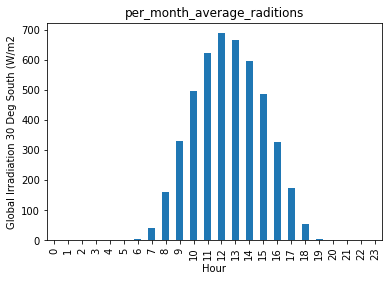

In [76]:
pv_hour.plot(kind='bar', title='per_month_average_raditions', legend=False, ylabel='Global Irradiation 30 Deg South (W/m2')

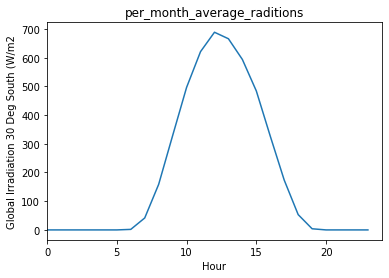

In [77]:
pv_hour.plot(kind='line', title='per_month_average_raditions', legend=False, ylabel='Global Irradiation 30 Deg South (W/m2', xlim=(0,24))

In [78]:
pv_hour_array= numpy.array(pv_hour)[:,0]
type(pv_hour_array)

numpy.ndarray

In [79]:
print('Area under curve by using TRAPIZODAL AND SIMPSON rule:')
print('By Trapizodial:',trapz(pv_hour_array))
print('By Simpson:', )

Area under curve by using TRAPIZODAL AND SIMPSON rule:
By Trapizodial: 4637.212928904002
By Simpson:


In [80]:
print('the peaksun is calculated as {} Hours'.format(trapz(pv_hour_array)/1000))

the peaksun is calculated as 4.6372129289040025 Hours


In [81]:
print('the peaksun is calculated as {} Hours'.format(simps(pv_hour_array)/1000))

the peaksun is calculated as 4.637212928904002 Hours


**Hence peaksun hours is 4.672 Hours**